In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# HW 1 (Problem 2)
# Sophia Godfrey
# Student ID: 801149485

In [3]:
filePath="D3.csv"

# Load dataset
df = pd.read_csv(filePath, index_col=False)

# Display the first 5 rows of the DataFrame
print(df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [13]:
# Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    sqrErrors = np.square(errors)
    J = (1 / (2 * m)) * np.sum(sqrErrors)
    return J

In [5]:
# Gradient Descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (alpha / m) * X.T.dot(errors)
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [8]:
# Multiple Linear Regression
def run_multiple_variable_regression(df, alphas, iterations=1000):
    m = len(df)
    X = np.c_[np.ones(m), df[['X1','X2','X3']].values]  # Add intercept
    y = df['Y'].values.reshape(-1,1)

    best_theta = None
    best_alpha = None
    best_cost_history = None
    best_final_cost = float('inf')

    for alpha in alphas:
        theta = np.zeros((X.shape[1],1))
        theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
        final_cost = cost_history[-1]
        print(f"Alpha: {alpha}, Final Cost: {final_cost:.4f}")

        if final_cost < best_final_cost:
            best_final_cost = final_cost
            best_theta = theta
            best_alpha = alpha
            best_cost_history = cost_history

    return best_theta, best_alpha, best_cost_history

In [9]:
# Learning rates to test
learning_rates = [0.01, 0.05, 0.1]
iterations = 1000

# Train using all explanatory variables
best_theta, best_alpha, best_cost_history = run_multiple_variable_regression(df, learning_rates, iterations)

Alpha: 0.01, Final Cost: 0.9338
Alpha: 0.05, Final Cost: 0.7385
Alpha: 0.1, Final Cost: 0.7385


In [10]:
# Report final linear model
theta_flat = best_theta.flatten()
print(f"\nBest model found with alpha={best_alpha}:")
print(f"y = {theta_flat[1]:.4f}*x1 + {theta_flat[2]:.4f}*x2 + {theta_flat[3]:.4f}*x3 + {theta_flat[0]:.4f}")


Best model found with alpha=0.1:
y = -2.0037*x1 + 0.5326*x2 + -0.2656*x3 + 5.3139


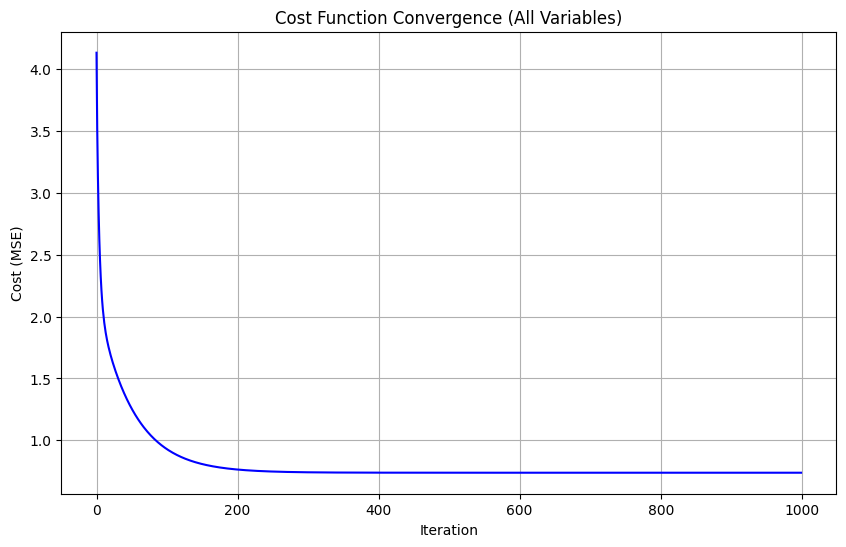

In [11]:
# Plot loss over iterations
plt.figure(figsize=(10,6))
plt.plot(range(iterations), best_cost_history, color='blue')
plt.title('Cost Function Convergence (All Variables)')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

In [12]:
# Predict y for new inputs
new_X = np.array([[1,1,1],[2,0,4],[3,2,1]])
new_X = np.c_[np.ones(len(new_X)), new_X]  # Add intercept
predictions = new_X.dot(best_theta)
for i, val in enumerate(predictions):
    print(f"Prediction for {new_X[i,1:]}: y = {val[0]:.4f}")

Prediction for [1. 1. 1.]: y = 3.5773
Prediction for [2. 0. 4.]: y = 0.2443
Prediction for [3. 2. 1.]: y = 0.1025
